In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [14]:
data = yf.download('TRYUSD=X', start='2018-01-01', end='2023-01-01',  interval = '1d')

[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      5,   Neg. LLF: 7963.2837534407445
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3911.234222527809
Iteration:      3,   Func. Count:     21,   Neg. LLF: 636363.7124518962
Iteration:      4,   Func. Count:     26,   Neg. LLF: 513710.07934987627
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1812.6075990457348
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1810.377968193378
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1810.0273458351676
Iteration:      8,   Func. Count:     43,   Neg. LLF: 1809.9425701364955
Iteration:      9,   Func. Count:     47,   Neg. LLF: 1809.8679106666136
Iteration:     10,   Func. Count:     51,   Neg. LLF: 1809.8488983562424
Iteration:     11,   Func. Count:     55,   Neg. LLF: 1809.848303711398
Iteration:     12,   Func. Count:     59,   Neg. LLF: 1809.8482889196928
Iteration:     13,   Func. Count:     62,   Neg. LLF: 1809.8482889196882
Optimization terminated successfully    (Exit mode 0)
 

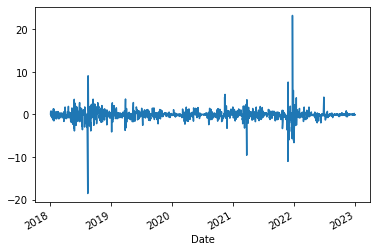

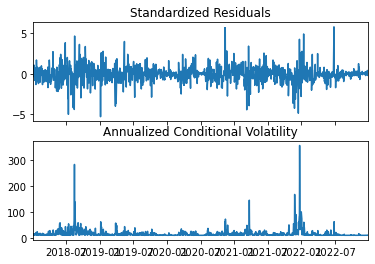

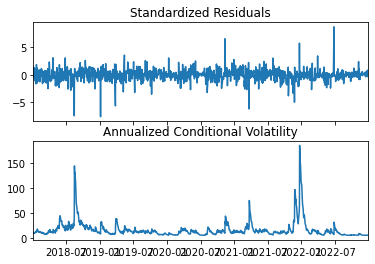

In [19]:
import matplotlib.pyplot as plt
import datetime as dt  # optional


market = data["Adj Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

#xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# Estimating a GARCH and ARCH models
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs




Iteration:      1,   Func. Count:      7,   Neg. LLF: 8193.275138215755
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4801.3072478723825
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5952.834309195217
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1864.3160022862241
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1683.2619347809086
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1688.74869597605
Iteration:      7,   Func. Count:     56,   Neg. LLF: 1708.238834117488
Iteration:      8,   Func. Count:     63,   Neg. LLF: 1680.4733410578197
Iteration:      9,   Func. Count:     70,   Neg. LLF: 1676.519470017363
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1676.062905325441
Iteration:     11,   Func. Count:     83,   Neg. LLF: 1676.0023215594906
Iteration:     12,   Func. Count:     90,   Neg. LLF: 1677.0436802178751
Iteration:     13,   Func. Count:     97,   Neg. LLF: 1675.9225881915086
Iteration:     14,   Func. Count:    105,   Neg. LLF: 1675

/Users/hakanozkir/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


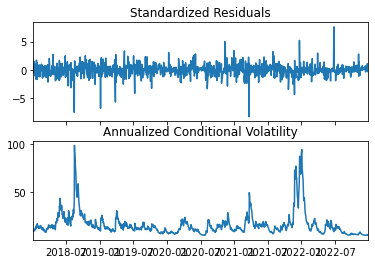

In [20]:
# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs

In [22]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.0
mean,0.142246,0.143099,0.141192,0.142234,0.142234,0.0
std,0.055659,0.055956,0.055317,0.055662,0.055662,0.0
min,0.053467,0.053496,0.053210,0.053467,0.053467,0.0
25%,0.112857,0.113218,0.112500,0.112874,0.112874,0.0
50%,0.144380,0.145222,0.143464,0.144390,0.144390,0.0
75%,0.175382,0.176288,0.174542,0.175410,0.175410,0.0
max,0.267875,0.269085,0.266326,0.267928,0.267928,0.0


In [ ]:
import yfinance as yf

# Get the stock info
stock = yf.Ticker("TRYUSD=X")

# Get the historical market data
hist = stock.history(period="max")

# Print the close price
print(hist["Close"][-1])

Text(0.5, 1.0, 'Price')

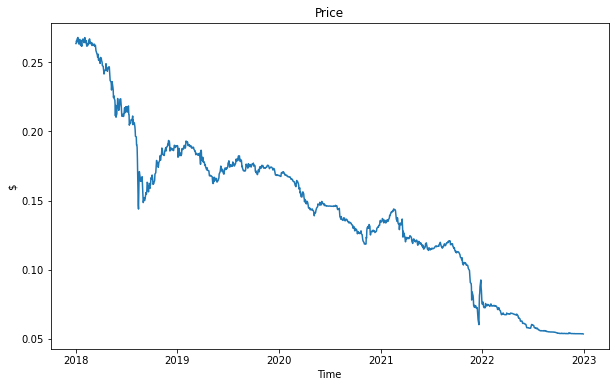

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Stock 1')
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Price')

In [25]:
data['Log returns']=np.log(data['Close']/data['Close'].shift())

Text(0.5, 1.0, 'Volatility')

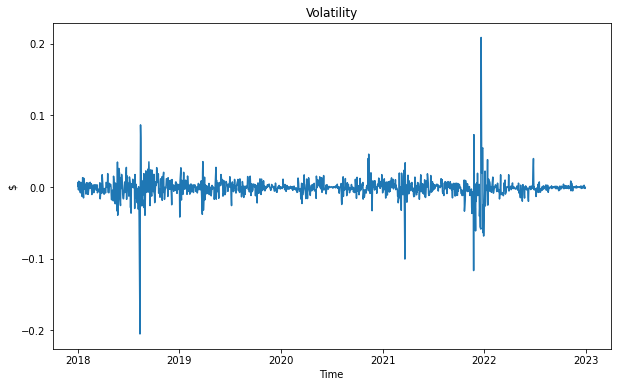

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data['Log returns'], label='Volatility')
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Volatility')